In [1]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# 回帰データの作成
# n_informative: 予測に必要な特徴量
n_features = 5
n_informative = 2
X, y = make_regression(
    n_samples=500,
    n_features=n_features,
    n_informative=n_informative,
    noise=0.5,
    random_state=777,
)

In [10]:
X = np.concatenate([X, np.log(X + 100)], 1)  # 冗長な特徴量を追加する

In [11]:
y_mean = y.mean(keepdims=True)
y_std = np.std(y, keepdims=True)

In [12]:
# 正規化
y = (y - y_mean) / y_std

In [13]:
lin_r = make_pipeline(StandardScaler(with_mean=False), LinearRegression()).fit(X, y)
rid_r = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=2)).fit(X, y)
las_r = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=0.1)).fit(X, y)

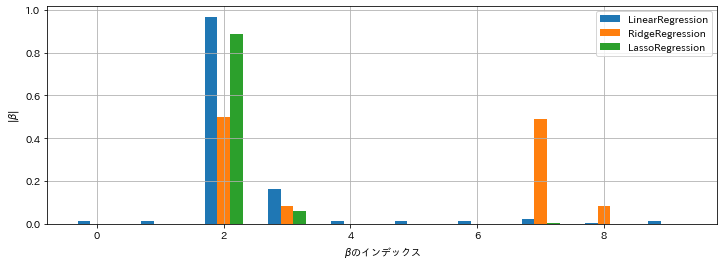

In [14]:
feat_index = np.array([i for i in range(X.shape[1])])

plt.figure(figsize=(12, 4))
plt.bar(
    feat_index - 0.2,
    np.abs(lin_r.steps[1][1].coef_),
    width=0.2,
    label="LinearRegression",
)
plt.bar(feat_index, np.abs(rid_r.steps[1][1].coef_), width=0.2, label="RidgeRegression")
plt.bar(
    feat_index + 0.2,
    np.abs(las_r.steps[1][1].coef_),
    width=0.2,
    label="LassoRegression",
)

plt.xlabel(r"$\beta$のインデックス")
plt.ylabel(r"$|\beta|$")
plt.grid()
plt.legend()